# Assignment 1
### Team Members: Alex Kim, Bolun Zhang, Chu Nie, Davis Gill

### Scraper Script


In [ ]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint

In [ ]:
headers = {'Accept-Languages':"en-US,en;q=0.5"}
date = []
dateTime = []
message = []
old_pages = np.arange(1,110,1)
for page in old_pages:

    #print(page)

    page = requests.get('https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p'+str(page))
    soup = BeautifulSoup(page.text,'html.parser')

    comment_data = soup.findAll('div',attrs = {'class':'Comment'})

    sleep(randint(2,8))

    for c in comment_data:

        # Date and DateTime
        d = c.time.attrs['title'] # date
        dt = c.time.attrs['datetime'] # dateTime
        date.append(d)
        dateTime.append(dt)

        # Comment Body Paragraph
        comment = c.find('div', class_ = 'Message userContent').text
        message.append(comment)


old_luxury_sedan_comments = pd.DataFrame({'date':date, 'dateTime':dateTime, 'message': message})
old_luxury_sedan_comments = old_luxury_sedan_comments.drop_duplicates(['message'])
old_luxury_sedan_comments.reset_index(drop = True)

,date,dateTime,message
0,"March 24, 2002 10:54PM",2002-03-25T05:54:02+00:00,\nI personally think that with a few tweaks th...
1,"March 25, 2002 12:06AM",2002-03-25T07:06:29+00:00,\nI am debating a new purchase and these two a...
2,"March 25, 2002 10:02AM",2002-03-25T17:02:27+00:00,"\nGreat handling, RWD, excellent engine and th..."
3,"March 25, 2002 4:04PM",2002-03-25T23:04:37+00:00,\nAnd no manual tranny. That may not matter to...
4,"March 25, 2002 5:44PM",2002-03-26T00:44:13+00:00,\nOne beauty of BMW 3 Series is that there are...
...,...,...,...
5426,"August 1, 2006 6:35AM",2006-08-01T13:35:58+00:00,\nwill of course vary greatly depending on whe...
5427,"August 1, 2006 7:53AM",2006-08-01T14:53:55+00:00,\nYes. in 2003 I bought my 330i ZHP off a lot....
5428,"August 1, 2006 9:13AM",2006-08-01T16:13:23+00:00,"\nNo, I bought my ZHP off the lot in 2003 - I ..."
5429,"August 1, 2006 2:41PM",2006-08-01T21:41:31+00:00,"\nNo, I bought my ZHP off the lot in 2003 - I ..."


In [ ]:
old_luxury_sedan_comments.to_csv('old_luxury_sedan_comments.csv')

### Task A

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from nltk.tokenize import TreebankWordTokenizer

In [ ]:
data = pd.read_csv('old_luxury_sedan_comments.csv')

tokenizer = TreebankWordTokenizer()
word_book = set()
words = []

for i in range(len(data)):

    m = data['message'][i]
    tokens = tokenizer.tokenize(m)
    for t in tokens:
        word_book.add(t.lower())
        words.append(t.lower())


counts = [(w, words.count(w)) for w in word_book]

def takeSecond(elem):
    return elem[1]

counts.sort(key = takeSecond,reverse = True)

w, c = zip(*counts)

# Top 100
top_100_words = w[0:100]
top_100_words_freq = c[0:100]

rank = np.arange(1,101)

## Theoretical Zipf's Law
constant = 1*c[0] # constant = rank * frequency
zipf_pred = constant / rank

In [ ]:
# Top 1500
top_1500_words = w[0:1500]
top_1500_words_freq = c[0:1500]

rank1500 = np.arange(1,1501)

## Theoretical Zipf's Law
constant1500 = 1*c[0] # constant = rank * frequency
zipf_pred1500 = constant1500 / rank1500

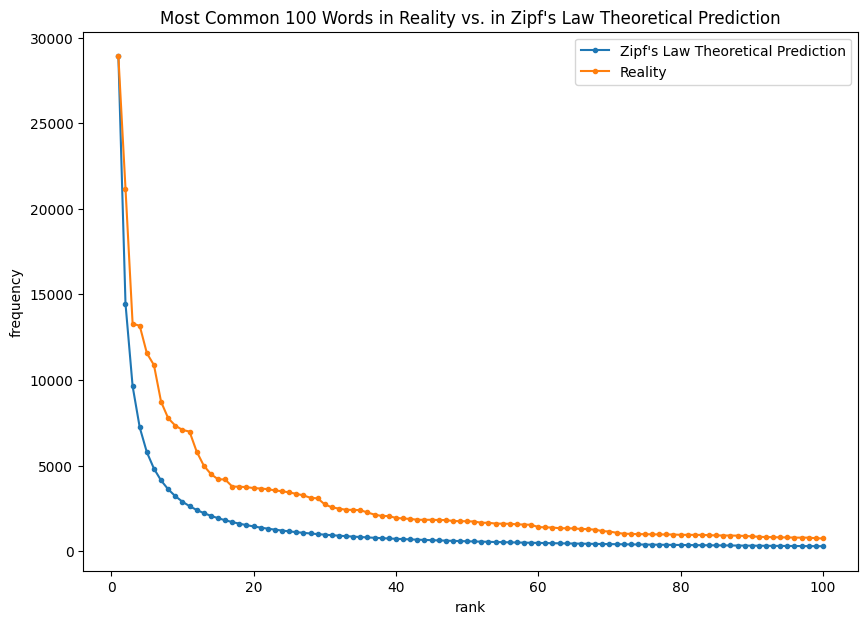

In [ ]:
# Plot
plt.figure(figsize = (10,7))
plt.plot(rank,zipf_pred, marker = '.',label = "Zipf's Law Theoretical Prediction")
plt.plot(rank,top_100_words_freq, marker = '.',label = "Reality")
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title("Most Common 100 Words in Reality vs. in Zipf's Law Theoretical Prediction")
plt.legend()

plt.savefig('mostCommon100Words.svg',format = 'svg')

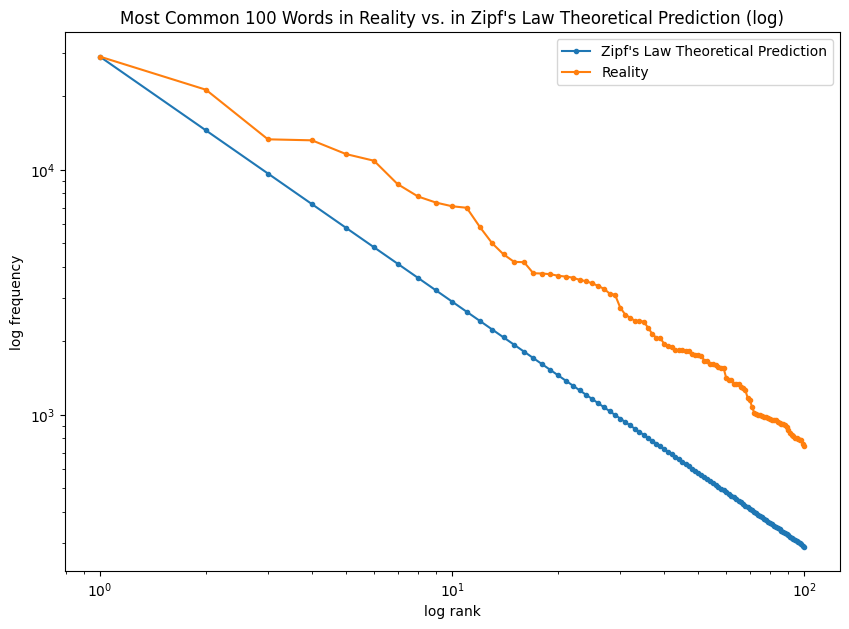

In [ ]:
# Plot Log
plt.figure(figsize = (10,7))
plt.plot(rank,zipf_pred, marker = '.',label = "Zipf's Law Theoretical Prediction")
plt.plot(rank,top_100_words_freq, marker = '.',label = "Reality")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log rank')
plt.ylabel('log frequency')
plt.title("Most Common 100 Words in Reality vs. in Zipf's Law Theoretical Prediction (log)")
plt.legend()

plt.savefig('mostCommon100Words_log.svg',format = 'svg')

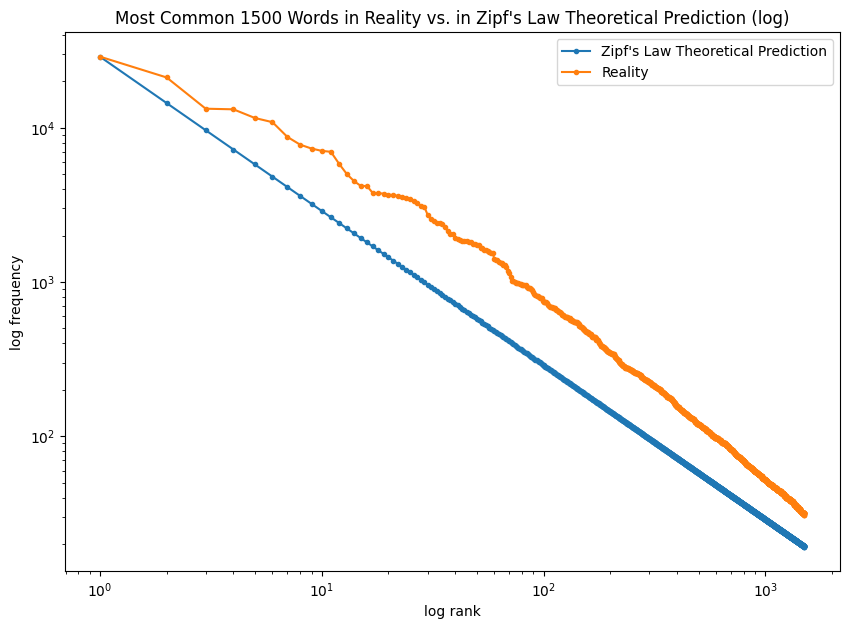

In [ ]:
# Plot Log Top 1500
plt.figure(figsize = (10,7))
plt.plot(rank1500,zipf_pred1500, marker = '.',label = "Zipf's Law Theoretical Prediction")
plt.plot(rank1500,top_1500_words_freq, marker = '.',label = "Reality")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log rank')
plt.ylabel('log frequency')
plt.title("Most Common 1500 Words in Reality vs. in Zipf's Law Theoretical Prediction (log)")
plt.legend()

plt.savefig('mostCommon1500Words_log.svg',format = 'svg')

In [ ]:
from scipy.stats import linregress

slope_1500 = linregress(rank1500,top_1500_words_freq)
pred_slope_1500 = linregress(rank1500,zipf_pred1500)
print('Actual Slope: {}'.format(slope_1500.slope))

Actual Slope: -0.9597719714542098


According to the theoretical Zipf's Law, the predicted slope should be -1.(Blue line) To test if the actual data fits the Zipf's Law, empirical analysis was done. See below:

In [ ]:
import math
log_freq = [math.log(x) for x in top_1500_words_freq]
log_rank = [math.log(x) for x in rank1500]
log_pred_freq = [math.log(x) for x in zipf_pred1500]

residual = np.array(log_freq) - np.array(log_pred_freq)
mse = np.sum(residual**2)/(len(log_rank)-2)
se = np.sqrt(mse/np.sum((log_rank - np.mean(log_rank))**2))
t = (slope_1500.slope - (-1))/se
t

2.1772707770687463

t-stat = 2.1773. Thus, we can say t-stat > 1.96, that is, our data supports Zipf's Law in 95% confidence interval.

### TaskB

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = pd.read_csv('old_luxury_sedan_comments.csv')
car_info = pd.read_csv('car_models_and_brands.csv')

In [ ]:
tokenizer = TreebankWordTokenizer()
words_unique = []
modelList = car_info.drop_duplicates()['Model'].to_list()
brandList = car_info.drop_duplicates()['Brand'].to_list()


for i in range(len(data)):

    temp = set()
    m = data['message'][i]
    tokens = tokenizer.tokenize(m)

    for t in tokens:
        t = t.lower()
        if t in modelList:
            n = modelList.index(t)
            t = brandList[n]
            temp.add(t)
        else:
            temp.add(t)

    for x in temp:
        x = str(x)
        words_unique.append(x)


words_unique_english = pd.Series(words_unique).value_counts().to_frame().reset_index()
words_unique_english.rename(columns = {'index':'word',0:'count'},inplace = True)
words_unique_english= words_unique_english[words_unique_english['word'].apply(lambda x: x.isalpha())]

stopWords = stopwords.words('english')
df_clean = words_unique_english[words_unique_english['word'].isin(stopWords)==False] # without stopWords
car_brand_count = df_clean[df_clean['word'].isin(brandList)].sort_values(['count'], ascending = False)


In [ ]:
# save as csv file
car_brand_count.to_csv('car_brand_frequency.csv', index = False)

In [ ]:
not_brands = ['car','sedan','seat','problem']
car_brand_freq = car_brand_count[car_brand_count['word'].isin(not_brands)== False]
top_10_brands = car_brand_freq.set_index('word')['count']
top_10_brands.head(10)

word
bmw           1501
acura          565
audi           449
honda          416
infiniti       402
nissan         294
toyota         293
mercedes       223
subaru         211
volkswagen     174
Name: count, dtype: int64

### Task C

Top 10 brands based on Task B: bmw, acura, audi, honda, infiniti, nissan, toyota, mercedes, subaru, volkswagen

In [ ]:
top10_brands = car_brand_freq['word'][:10].to_list()
possible_comb = []
from itertools import combinations

def pairs(lst):
    return list(combinations(lst, 2))

possible_comb = (pairs(top10_brands))

In [ ]:
tokenizer = TreebankWordTokenizer()
all_sentence_d = []

for i in range(len(data)):
    sentence_d = []

    m = data['message'][i]
    tokens = tokenizer.tokenize(m)
    for t in tokens:
        sentence_d.append(t.lower())

    all_sentence_d.append(sentence_d)

In [ ]:
def index_difference(word1, word2, lst):
    try:
        index1 = lst.index(word1)
        index2 = lst.index(word2)
        return abs(index1 - index2)
    except ValueError:
        return None

In [ ]:
pairs_count = {}

for pairs in possible_comb:
    pairs_count[pairs] = 0

for i in range (len(all_sentence_d)):
    for pairs in possible_comb:
        brand1 = pairs[0]
        brand2 = pairs[1]
        if brand1 in all_sentence_d[i] and brand2 in all_sentence_d[i] and index_difference(brand1, brand2, all_sentence_d[i])<=15:
            pairs_count[pairs] += 1

In [ ]:
single_mention = car_brand_count
pairs_lift = {}
N = len(data)

for key, value in pairs_count.items():
    commen_mention = value
    single_value1 = single_mention[single_mention['word'] == key[0]]['count'].tolist()[0]
    single_value2 = single_mention[single_mention['word'] == key[1]]['count'].tolist()[0]
    pairs_lift[key] = N*value/(single_value1*single_value2)

lift_df = pd.DataFrame(columns = top10_brands, index = top10_brands)
for keys, value in pairs_lift.items():
    brand1, brand2 = keys
    lift_df[brand1][brand2] = value
    lift_df[brand2][brand1] = '-'
    lift_df[brand1][brand1] = '-'
    lift_df[brand2][brand2] = '-'


lift_df

,bmw,acura,audi,honda,infiniti,nissan,toyota,mercedes,subaru,volkswagen
bmw,-,-,-,-,-,-,-,-,-,-
acura,0.422663,-,-,-,-,-,-,-,-,-
audi,0.572152,0.663662,-,-,-,-,-,-,-,-
honda,0.104373,0.300387,0.087229,-,-,-,-,-,-,-
infiniti,0.639045,1.721622,0.962847,0.162379,-,-,-,-,-,-
nissan,0.135377,0.228866,0.041142,1.110144,0.459522,-,-,-,-,-
toyota,0.098792,0.164034,0.082565,1.64862,0.092218,1.513129,-,-,-,-
mercedes,0.486761,0.301734,0.922099,0.175632,0.484662,0.165675,0.249361,-,-,-
subaru,0.120037,0.273338,0.343955,0.18562,0.512226,0.350195,0.263543,0.0,-,-
volkswagen,0.062384,0.055244,0.208548,0.07503,0.0,0.106165,0.106528,0.0,0.0,-


### Task D

In [ ]:
# Extract unique brand names
brand_names = list(set(brand for pair in pairs_lift for brand in pair))

# Create an empty DataFrame with brand names as columns and index
lift_matrix = pd.DataFrame(index=brand_names, columns=brand_names)

# Fill the matrix with lift values
for (brand1, brand2), lift_value in pairs_lift.items():
    lift_matrix.at[brand1, brand2] = lift_value
    lift_matrix.at[brand2, brand1] = lift_value

# Fill diagonal with zeros
lift_matrix.fillna(0, inplace=True)
# Convert the lift_matrix to a DataFrame
lift_matrix_df = pd.DataFrame(lift_matrix)
lift_matrix_df

,bmw,subaru,acura,audi,infiniti,nissan,honda,mercedes,volkswagen,toyota
bmw,0.000000,0.120037,0.422663,0.572152,0.639045,0.135377,0.104373,0.486761,0.062384,0.098792
subaru,0.120037,0.000000,0.273338,0.343955,0.512226,0.350195,0.185620,0.000000,0.000000,0.263543
acura,0.422663,0.273338,0.000000,0.663662,1.721622,0.228866,0.300387,0.301734,0.055244,0.164034
audi,0.572152,0.343955,0.663662,0.000000,0.962847,0.041142,0.087229,0.922099,0.208548,0.082565
infiniti,0.639045,0.512226,1.721622,0.962847,0.000000,0.459522,0.162379,0.484662,0.000000,0.092218
nissan,0.135377,0.350195,0.228866,0.041142,0.459522,0.000000,1.110144,0.165675,0.106165,1.513129
honda,0.104373,0.185620,0.300387,0.087229,0.162379,1.110144,0.000000,0.175632,0.075030,1.648620
mercedes,0.486761,0.000000,0.301734,0.922099,0.484662,0.165675,0.175632,0.000000,0.000000,0.249361
volkswagen,0.062384,0.000000,0.055244,0.208548,0.000000,0.106165,0.075030,0.000000,0.000000,0.106528
toyota,0.098792,0.263543,0.164034,0.082565,0.092218,1.513129,1.648620,0.249361,0.106528,0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalize

Text(0.5, 1.0, 'Multidimensional Scaling: Top 10 Brands Dissimilarities \n (Euclidean Distances = 1 / lift)')

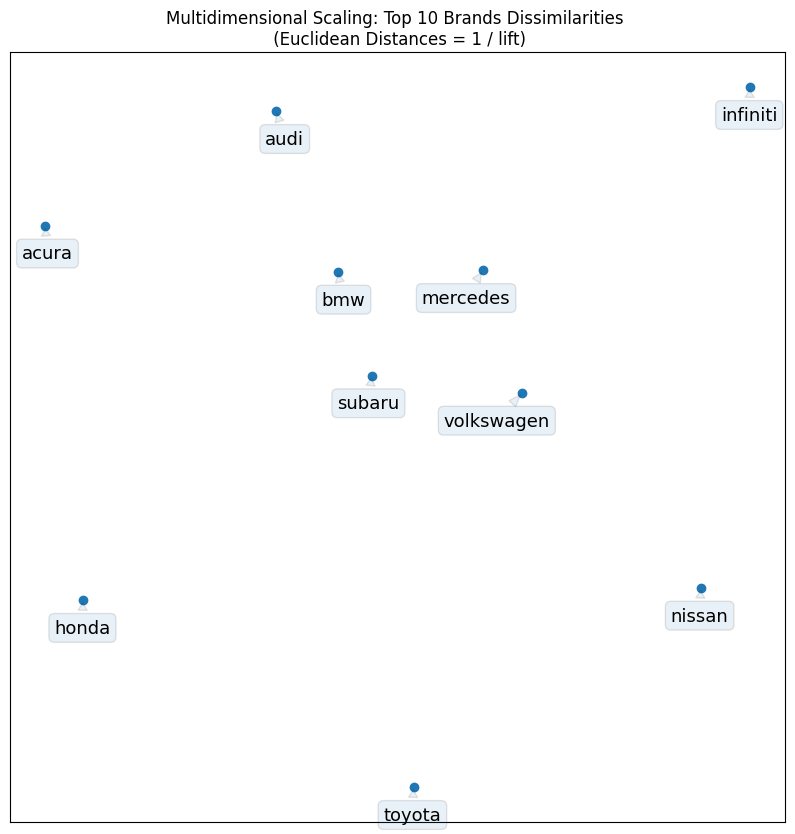

In [ ]:
from sklearn.manifold import MDS

# Extract the brand pairs from the lift_matrix
#brand_pairs = list(lift_matrix_df.columns)

# Performing MDS
mds = MDS(dissimilarity='euclidean',random_state=42)
mds_fit = mds.fit(lift_matrix_df)
coords = mds.fit_transform(lift_matrix_df)
x,y = coords.T
plt.figure(figsize=(10, 10))
plt.scatter(x,y)
for i, txt in enumerate(lift_matrix_df):
    plt.annotate(txt, (x[i], y[i]), xycoords='data',
             xytext=(20, -20), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))
plt.yticks([])
plt.xticks([])
plt.title('Multidimensional Scaling: Top 10 Brands Dissimilarities \n (Euclidean Distances = 1 / lift)')

## Task E

From our analysis of the lift ratios for association between the top 10 brands, we can highlight some important relationships to our client. Namely the high level association between brands like Infiniti and Acura, as well as Honda and Toyota. Our web scraping found that Edmunds users frequently compare or mention this brands in the same post. While we don't know whether it is positive or negative association, when Edmunds users, typically more car informed than the average customer, think of Infiniti, they also think of Acura, the same going for Toyota and Honda as well.

The MDS Map plots dissimilarity, plotting brands that are not mentioned together often. We did this to highlight that BMW, Volkswagon, Mercedes, and Subaru all lack a lift greater than 1 with any other car brand. There are multiple implications of this, maybe suggesting they operate within a niche within the market, that Edmunds users don't find reason to compare or mention them with other brands, or even that these brands aren't mentioned much at all. Meanwhile our scores with high lifts, such as Toyota, Honda, and Infiniti are all near the outskirts of the MDS Map. Pairs of car brands with high lift association scores are plotted far apart on the MDS Map, for example Honda and Toyota as well as Infinit and Acura.

## Task F

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
word_freq = {}
def get_word_freq(c):
    #take set because we only want to count a word once per comment
    tokens = set(word_tokenize(c))
    for token in tokens:
        #disregard if it is punctuation or stop word
        if (not token.isalpha()) or (token in stop_words):
            continue
        if token not in word_freq:
            word_freq[token] = 1
        else:
            word_freq[token] += 1
    return None
data['message'].map(get_word_freq)
potential_attributes = pd.Series(word_freq)
potential_attributes = potential_attributes.sort_values(ascending=False)

potential_attributes[:50]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


I              3681
car            2144
The            1525
like           1319
cars           1301
BMW            1237
would          1189
one            1144
get            1054
TL             1020
think          1005
It              873
much            793
better          768
drive           764
know            689
new             681
If              665
even            661
really          648
people          645
performance     630
good            613
driving         605
want            601
still           561
say             551
way             543
time            532
But             531
sedan           527
also            522
see             521
well            516
could           514
make            510
That            503
You             502
go              479
best            461
buy             456
And             456
engine          446
going           441
price           437
luxury          428
great           417
years           414
many            412
right           409


Not all of the above words are attributes. Scanning through, it appears the top 5 attributes are **'performance'**, **'engine'**, **'price'**, **'luxury'**, and **'handling'**.

In [ ]:
# Create list of top 5 attributes
top_5_attributes = ["performance", "engine", "price", "luxury", "handling"]

In [ ]:
def get_brand_attr_lift(brand, attribute):
    freq_brand = top_10_brands[brand]
    freq_attribute = potential_attributes[attribute]
    freq_both = 0

    for comment in data['message']:
        # Tokenize the comment into words
        words = comment.lower().split()  # Assuming lowercase for case insensitivity

        # Check if both brand and attribute exist in the words
        if brand.lower() in words and attribute.lower() in words:
            freq_both += 1

    # Calculate lift
    return (len(data) * freq_both) / (freq_brand * freq_attribute)

brand_attr_lifts = pd.DataFrame(data = 0, index = top_10_brands[:5].index, columns=top_5_attributes)
brand_attr_lifts.head()
for brand in top_10_brands[:5].index:
    for attr in top_5_attributes:
        brand_attr_lifts.loc[brand, attr] = get_brand_attr_lift(brand, attr)

brand_attr_lifts

,performance,engine,price,luxury,handling
word,,,,,
bmw,0.855746,0.949183,1.084648,0.853840,0.945066
acura,0.884950,0.754335,0.901849,1.010648,0.669520
audi,0.575989,0.759376,0.691978,0.819573,0.601780
honda,0.414454,0.439079,0.388372,0.640563,0.324758
infiniti,1.072218,0.999615,1.236609,1.199482,0.705744


## Task G

**BMW** - For being considered the 'ultimate driving machine', the lift values of 'performance' and 'luxury' were the lowest of the top five attributes associated with the brand. The product team should consider why perceived performance and luxury are low, and work to improve these associations with the brand in order to align with their desired positioning. On the other hand, there was a significant lift value of BMW and 'price', suggesting that value could be an aspect the marketing team seeks to capitalize on. Should changing consumer perceptions about 'performance' and 'luxury' not pan out, perhaps leaning into the value of BMWs is the best avenue.

**Acura** - The lift score for 'handling' was low, followed by 'engine'. This perhaps is not a surprise given how Acura prioritizes promoting itself as a luxury brand first and foremost (which it appears to be succeeding with a high lift value for 'luxury'). But if they would like to further establish the perceived performance of their cars, the handling and engine may be the best place to revisit first.

**Audi** - Audi had low lift values for 'performance' and 'handling'. These could be areas of significant improvement that the product team seeks to change consumer perception of the brand. The lift score for 'luxury' was the highest of the five attributes for Audi, which does align with their positioning as high quality and premium - emphasizing status and features over performance. But even this lift score is under 1 and leaves room for improvement.

**Honda** - Honda had comparatively low lift scores across all five attributes compared to the other top brands. This is not a surprise as Honda is not typically though of as competing in the entry-level luxury space. Perhaps it is only commonly discussed as a point of comparison with other brands. That being said, if Honda does hope to capture some of this market space, they may want to seek to improve their perceived value and driving experience as the 'price' and 'handling' scores were the lowest.

**Infiniti** - Infinity saw high lift scores for 'performance', 'price', and 'luxury', suggesting that the marketing team could emphasis Infiniti's unique blend of luxury and performance at a fair price. The product team could focus on the low lift value and thus poor perception of 'handling' as the area for most potential improvement.

## Task H

We choose the following words that associated with aspiration: "want", "love", "dream", "hope", "wish"
We replaced these words in the comments with word 'aspiration' and calculate its lift with different brands like we did in Task C.

In [ ]:
tokenizer = TreebankWordTokenizer()
all_sentence = []

for i in range(len(data)):
    sentence = []

    m = data['message'][i]
    tokens = tokenizer.tokenize(m)
    for t in tokens:
        sentence.append(t.lower())

    all_sentence.append(sentence)


In [ ]:
def replace_aspiration(sublist):
    words_to_replace = ["want", "love", "dream", "hope", "wish"]
    return ["aspiration" if word in words_to_replace else word for word in sublist]

modefied_sentence = []

for sentence in all_sentence:
    modefied_sentence.append(replace_aspiration(sentence))

In [ ]:
total_aspiration = 0

for sentence in modefied_sentence:
    if "aspiration" in sentence:
        total_aspiration += 1
print(total_aspiration)

919


In [ ]:
#single_mention = pd.read_csv('car_brand_frequency.csv')
single_mention = car_brand_freq
top_brands = single_mention['word'].tolist()
aspiration_comb = []
for brand in top_brands:
    aspiration_comb.append([brand, 'aspiration'])

aspiration_count = {}

for pairs in aspiration_comb:
    aspiration_count[pairs[0]] = 0

for i in range (len(modefied_sentence)):
    for pairs in aspiration_comb:
        brand = pairs[0]
        asp = pairs[1]
        if brand in modefied_sentence[i] and asp in modefied_sentence[i] :
            aspiration_count[pairs[0]] += 1
aspiration_count

{'bmw': 286,
 'acura': 103,
 'audi': 68,
 'honda': 45,
 'infiniti': 89,
 'nissan': 46,
 'toyota': 22,
 'mercedes': 24,
 'subaru': 19,
 'volkswagen': 0,
 'ford': 21,
 'volvo': 21,
 'hyundai': 7,
 'chevrolet': 1,
 'cadillac': 17,
 'mazda': 20,
 'chrysler': 11,
 'lincoln': 11,
 'dodge': 4,
 'pontiac': 6,
 'buick': 11,
 'mitsubishi': 7,
 'kia': 3,
 'suzuki': 1,
 'saturn': 2,
 'mercury': 1}

In [ ]:
#single_mention = pd.read_csv('car_brand_frequency.csv')
single_mention = car_brand_freq
aspiration_lift = {}
N = len(data)

for key, value in aspiration_count.items():
    commen_mention = value
    single_value1 = single_mention[single_mention['word'] == key]['count'].tolist()[0]
    single_value2 = total_aspiration
    aspiration_lift[key] = N*value/(single_value1*single_value2)

In [ ]:
aspiration_df = pd.DataFrame.from_dict(aspiration_lift, orient='index')
aspiration_df = aspiration_df.rename(columns = {0: 'Aspiration'})
aspiration_df[['Aspiration']].sort_values(by='Aspiration',ascending=False)[0:11]

,Aspiration
buick,1.857329
mitsubishi,1.798600
mazda,1.496123
infiniti,1.308363
lincoln,1.250126
mercury,1.181937
bmw,1.126029
acura,1.077341
saturn,1.074488
cadillac,1.057522


Our method revealed that Buick emerged as the most coveted car brand, a surprising outcome given its rarity on US roads. Further investigation showed that in the US, Buick often carries the reputation of being a vehicle for the older generation and typically comes with a price tag slightly above its peers. Recognizing this, Buick might consider repositioning itself as an upscale American alternative, introducing offerings that cater to a younger audience.